In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [16]:
# Load dataset
path = r"C:\Users\91971\Desktop\ML_Lab\Practical_2\dataset\StudentsPerformance.csv"
df = pd.read_csv(path)
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0           44.0  
4                    none        76.0           78.0           75.0  


In [15]:
# Step 1: Check missing values
print("\nMissing values count:")
print(df.isnull().sum())


Missing values count:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  2
writing score                  2
dtype: int64


In [17]:
# If missing values exist, apply imputation
df.fillna(df.mean(numeric_only=True), inplace=True)  
df.fillna(df.mode().iloc[0], inplace=True)  

In [18]:
print("\nAfter Imputation (No missing values):")
print(df.isnull().sum())



After Imputation (No missing values):
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [19]:
# Step 2: Encode categorical features

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)


Categorical Columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [20]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter Label Encoding:")
print(df.head())


After Label Encoding:
   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  
0                        1        72.0           72.0           74.0  
1                        0        69.0           90.0           88.0  
2                        1        90.0           95.0           93.0  
3                        1        47.0           57.0           44.0  
4                        1        76.0           78.0           75.0  


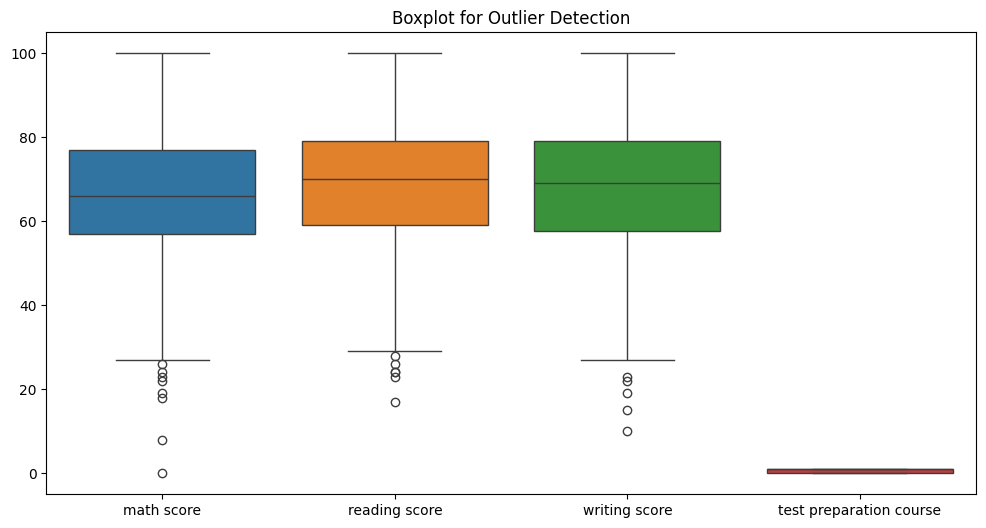

In [22]:
# Step 3: Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['math score','reading score','writing score','test preparation course']])  # few numeric cols
plt.title("Boxplot for Outlier Detection")
plt.show()

In [24]:
# Step 4: Feature Scaling
scaler = StandardScaler()   # try MinMaxScaler() also
scaled_data = scaler.fit_transform(df[['math score','reading score','writing score','test preparation course']])

scaled_df = pd.DataFrame(scaled_data, columns=['math score','reading score','writing score','test preparation course'])
print("\nScaled Features (Standardized):")
print(scaled_df.head())


Scaled Features (Standardized):
   math score  reading score  writing score  test preparation course
0    0.389082       0.193349       0.390960                 0.746748
1    0.190461       1.427653       1.312901                -1.339140
2    1.580806       1.770515       1.642166                 0.746748
3   -1.266091      -0.835237      -1.584627                 0.746748
4    0.653909       0.604784       0.456813                 0.746748


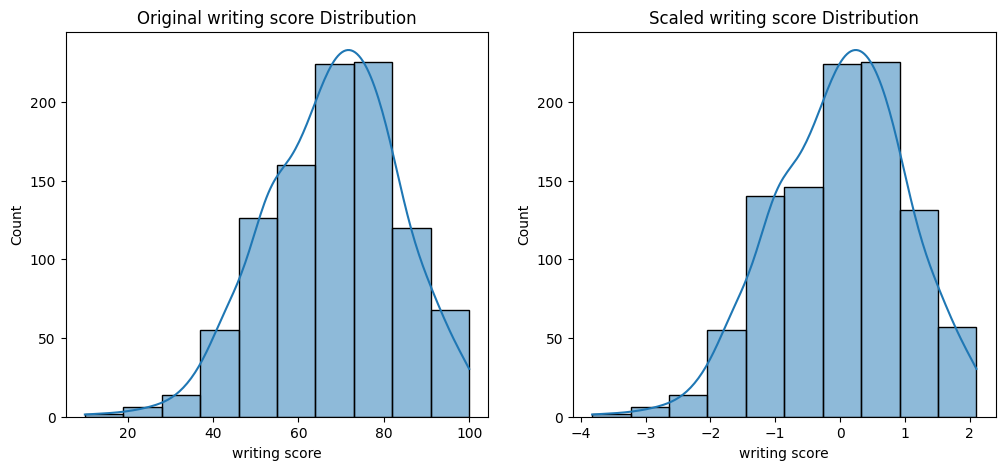

In [28]:
# Plot histogram before & after scaling
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['writing score'], bins=10, kde=True, ax=ax[0])
ax[0].set_title("Original writing score Distribution")
sns.histplot(scaled_df['writing score'], bins=10, kde=True, ax=ax[1])
ax[1].set_title("Scaled writing score Distribution")
plt.show()